# 3 Emotions 

First we import all the libraries needed to process the data and perform machine learning through scikit learn

In [111]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

In [112]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Plots"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Loading the dataset into a Pandas datafame

In [113]:
df = pd.read_csv("DC3.csv")

Reading and understanding the data values using the head function

In [114]:
df.head()

,1I,1H,2I,2H,3I,3H,4I,4H,5I,5H,...,11H,12I,12H,13I,13H,14I,14H,15I,15H,Emotion
0,825,69,777,69,755,70,736,70,788,71,...,70,946,69,925,69,908,68,893,68,2
1,943,67,918,67,931,67,955,67,931,66,...,66,917,66,927,66,952,66,923,66,3
2,791,67,789,68,819,69,915,69,965,69,...,66,925,66,926,66,923,66,944,66,3
3,853,66,848,66,875,67,842,67,868,67,...,67,917,67,931,67,912,67,873,67,2
4,815,71,858,71,961,71,1016,71,943,70,...,68,882,68,901,68,909,68,896,68,2


Next we will check the values and their information types to better understand the data

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1I       201 non-null    int64
 1   1H       201 non-null    int64
 2   2I       201 non-null    int64
 3   2H       201 non-null    int64
 4   3I       201 non-null    int64
 5   3H       201 non-null    int64
 6   4I       201 non-null    int64
 7   4H       201 non-null    int64
 8   5I       201 non-null    int64
 9   5H       201 non-null    int64
 10  6I       201 non-null    int64
 11  6H       201 non-null    int64
 12  7I       201 non-null    int64
 13  7H       201 non-null    int64
 14  8I       201 non-null    int64
 15  8H       201 non-null    int64
 16  9I       201 non-null    int64
 17  9H       201 non-null    int64
 18  10I      201 non-null    int64
 19  10H      201 non-null    int64
 20  11I      201 non-null    int64
 21  11H      201 non-null    int64
 22  12I      201 non-null    i

In [116]:
df.isnull().sum()

1I         0
1H         0
2I         0
2H         0
3I         0
3H         0
4I         0
4H         0
5I         0
5H         0
6I         0
6H         0
7I         0
7H         0
8I         0
8H         0
9I         0
9H         0
10I        0
10H        0
11I        0
11H        0
12I        0
12H        0
13I        0
13H        0
14I        0
14H        0
15I        0
15H        0
Emotion    0
dtype: int64

All data seems to be available and no null values detected observed in the dataset

In [117]:
df.describe()

,1I,1H,2I,2H,3I,3H,4I,4H,5I,5H,...,11H,12I,12H,13I,13H,14I,14H,15I,15H,Emotion
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,860.791045,73.114428,861.885572,73.283582,867.228856,73.636816,878.616915,73.636816,880.626866,73.800995,...,72.955224,910.860697,72.636816,905.328358,72.268657,898.134328,72.184080,892.084577,72.149254,2.079602
std,93.228033,58.536158,94.270419,59.799951,92.798477,63.175410,94.995618,63.176518,90.483562,66.346290,...,68.076156,87.266033,67.529641,87.828706,65.350038,85.883100,66.482937,85.993592,67.331847,0.832846
min,62.000000,60.000000,62.000000,60.000000,62.000000,59.000000,63.000000,59.000000,63.000000,60.000000,...,60.000000,61.000000,60.000000,61.000000,60.000000,60.000000,60.000000,60.000000,60.000000,1.000000
25%,816.000000,67.000000,818.000000,67.000000,825.000000,67.000000,829.000000,67.000000,843.000000,66.000000,...,66.000000,876.000000,66.000000,867.000000,66.000000,858.000000,66.000000,853.000000,66.000000,1.000000
50%,867.000000,69.000000,872.000000,69.000000,875.000000,69.000000,886.000000,69.000000,890.000000,69.000000,...,68.000000,912.000000,68.000000,905.000000,67.000000,900.000000,67.000000,892.000000,68.000000,2.000000
75%,916.000000,71.000000,915.000000,71.000000,927.000000,71.000000,937.000000,71.000000,931.000000,71.000000,...,70.000000,953.000000,70.000000,950.000000,69.000000,938.000000,69.000000,938.000000,69.000000,3.000000
max,1063.000000,897.000000,1076.000000,915.000000,1049.000000,963.000000,1096.000000,963.000000,1084.000000,1008.000000,...,1032.000000,1173.000000,1024.000000,1158.000000,993.000000,1121.000000,1009.000000,1159.000000,1021.000000,3.000000


After checking the values of each attribute the available data seems to contain correct data without outliers or noise as all values given are realistic. To visualise data values and their frequency we will look at a histogram for better understanding.

Saving figure attribute_histogram_plots


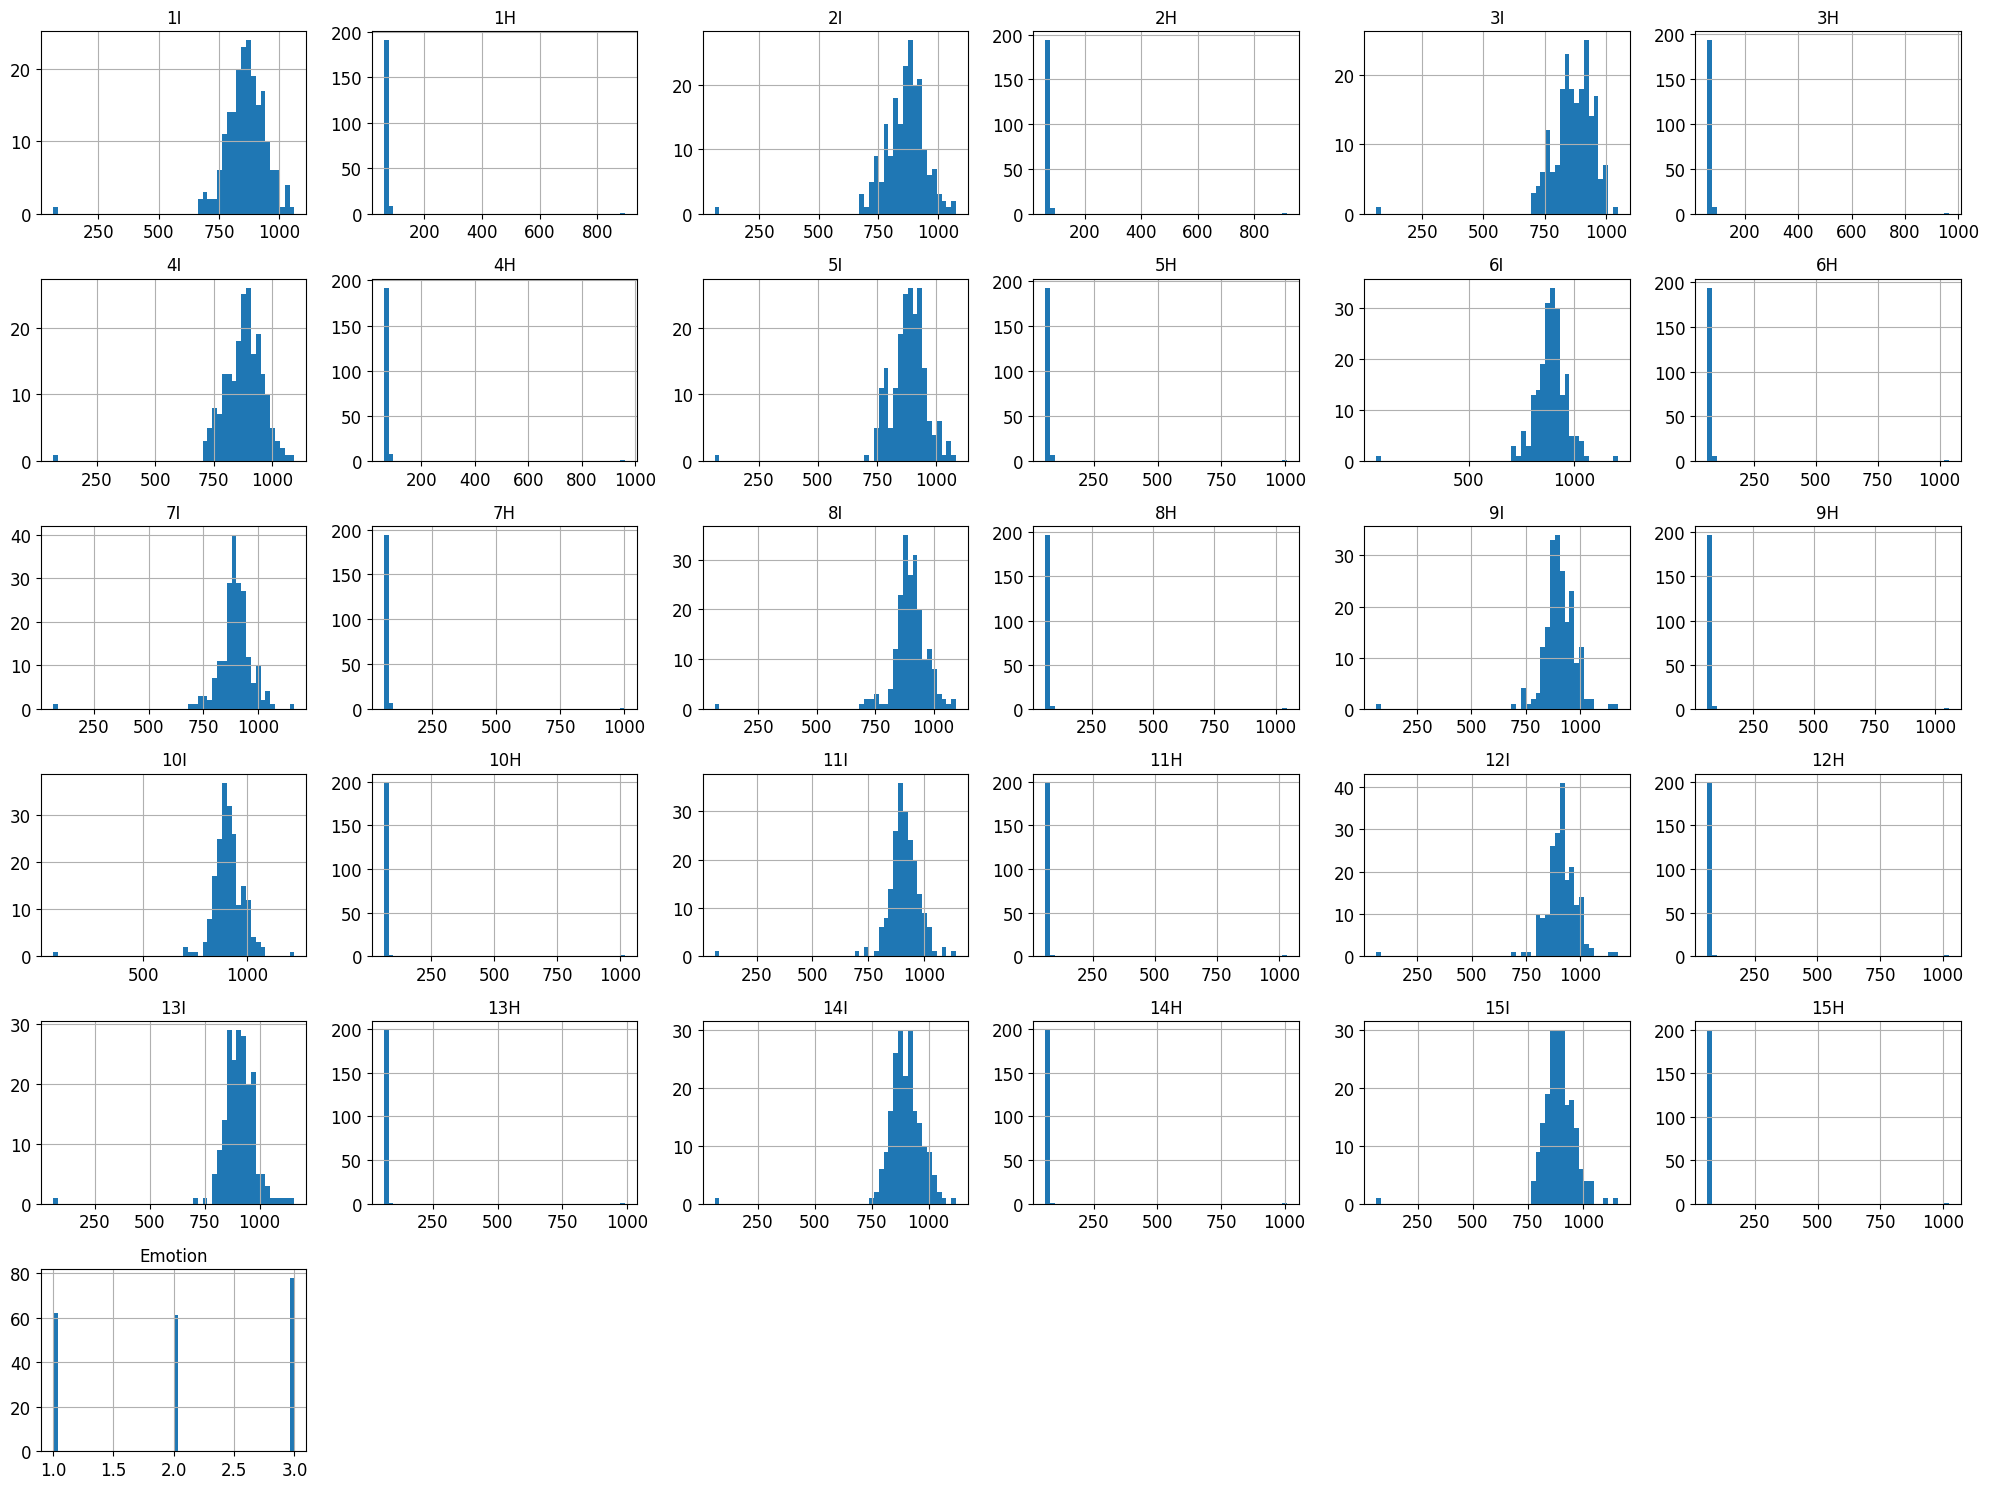

In [118]:
df.hist(bins=50, figsize=(20,15)) 
save_fig("attribute_histogram_plots")
plt.show()

Saving figure attribute_boxplots


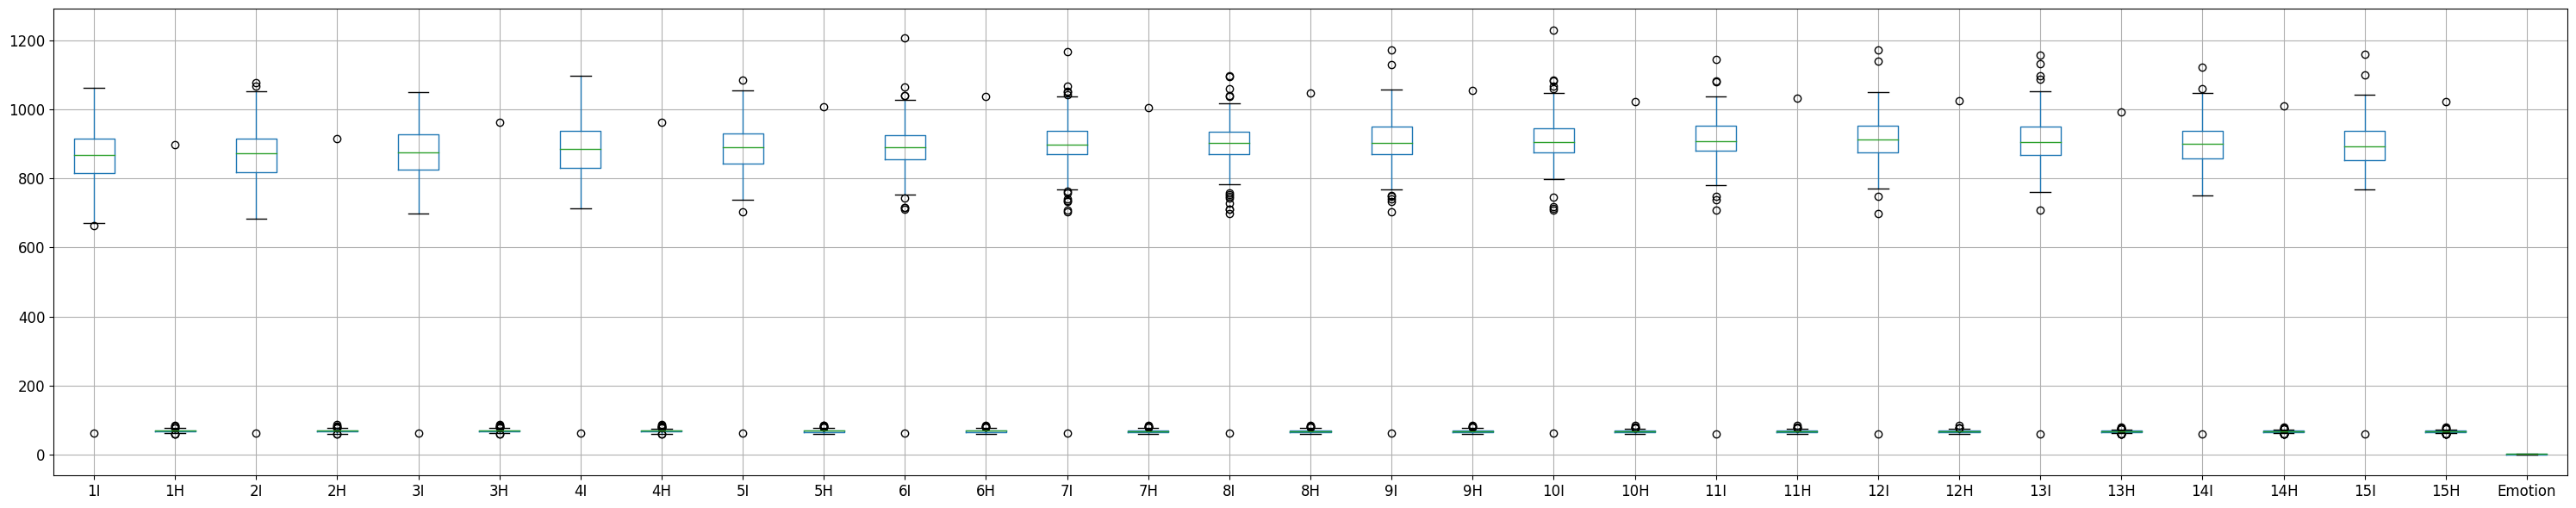

In [119]:
df.boxplot()
save_fig("attribute_boxplots")
plt.show()

This is a supervised dataset with all values labelled and the outcome (target) clearly stated. Lets look at the outcome values to check the number of target values available.

Saving figure Emotion_histogram


3    78
1    62
2    61
Name: Emotion, dtype: int64

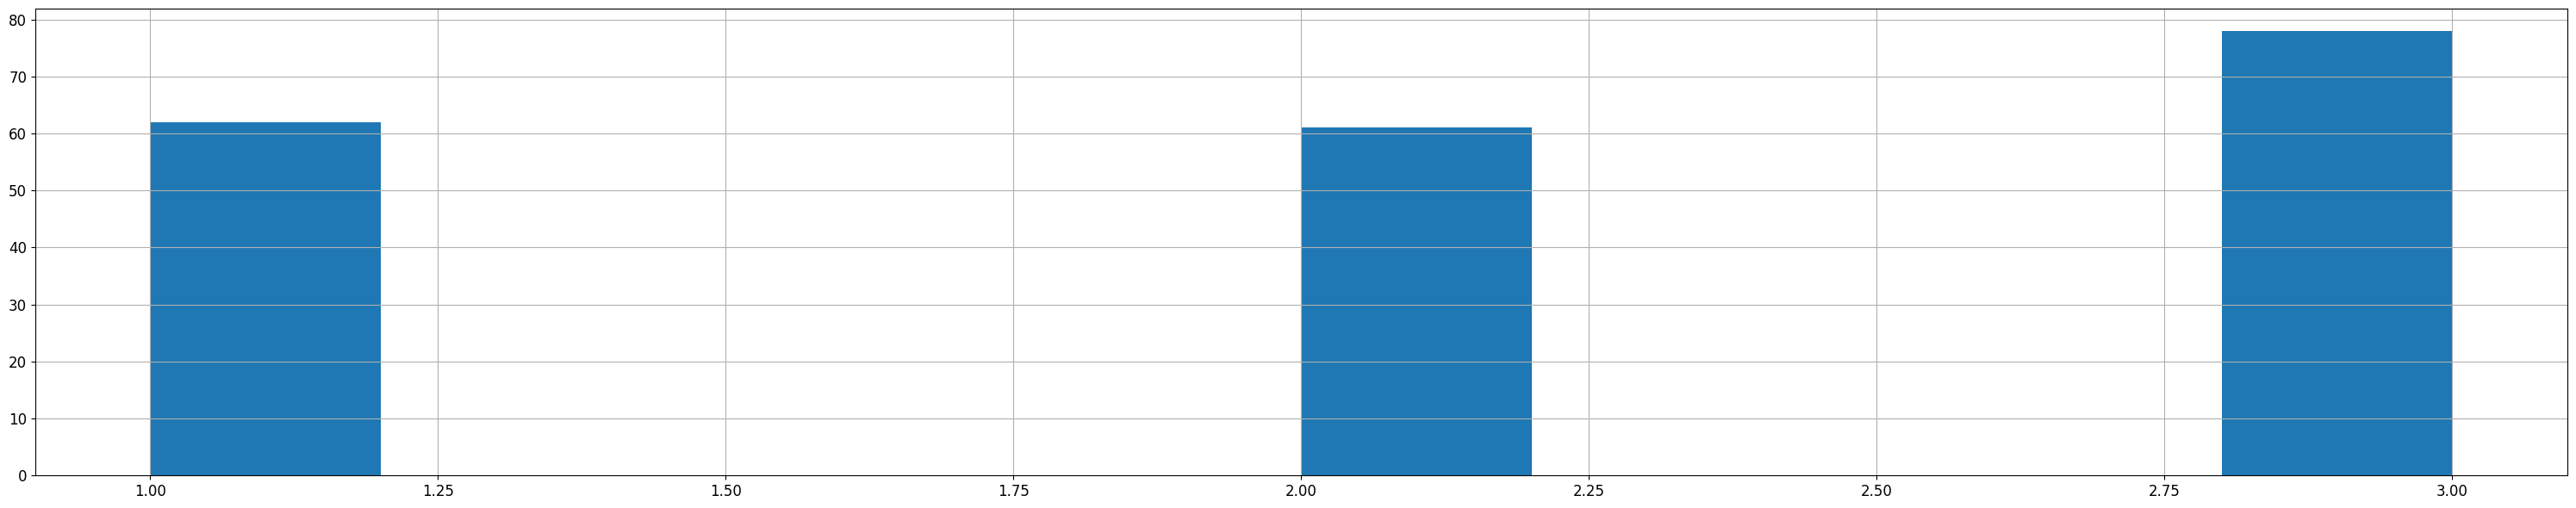

In [120]:
df["Emotion"].hist()
save_fig("Emotion_histogram")
df.Emotion.value_counts()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1I       201 non-null    int64
 1   1H       201 non-null    int64
 2   2I       201 non-null    int64
 3   2H       201 non-null    int64
 4   3I       201 non-null    int64
 5   3H       201 non-null    int64
 6   4I       201 non-null    int64
 7   4H       201 non-null    int64
 8   5I       201 non-null    int64
 9   5H       201 non-null    int64
 10  6I       201 non-null    int64
 11  6H       201 non-null    int64
 12  7I       201 non-null    int64
 13  7H       201 non-null    int64
 14  8I       201 non-null    int64
 15  8H       201 non-null    int64
 16  9I       201 non-null    int64
 17  9H       201 non-null    int64
 18  10I      201 non-null    int64
 19  10H      201 non-null    int64
 20  11I      201 non-null    int64
 21  11H      201 non-null    int64
 22  12I      201 non-null    i

Next we will look at the correlation between each parameter by using the correlation heatmap in seaborn.

Saving figure correlation_matrix


[]

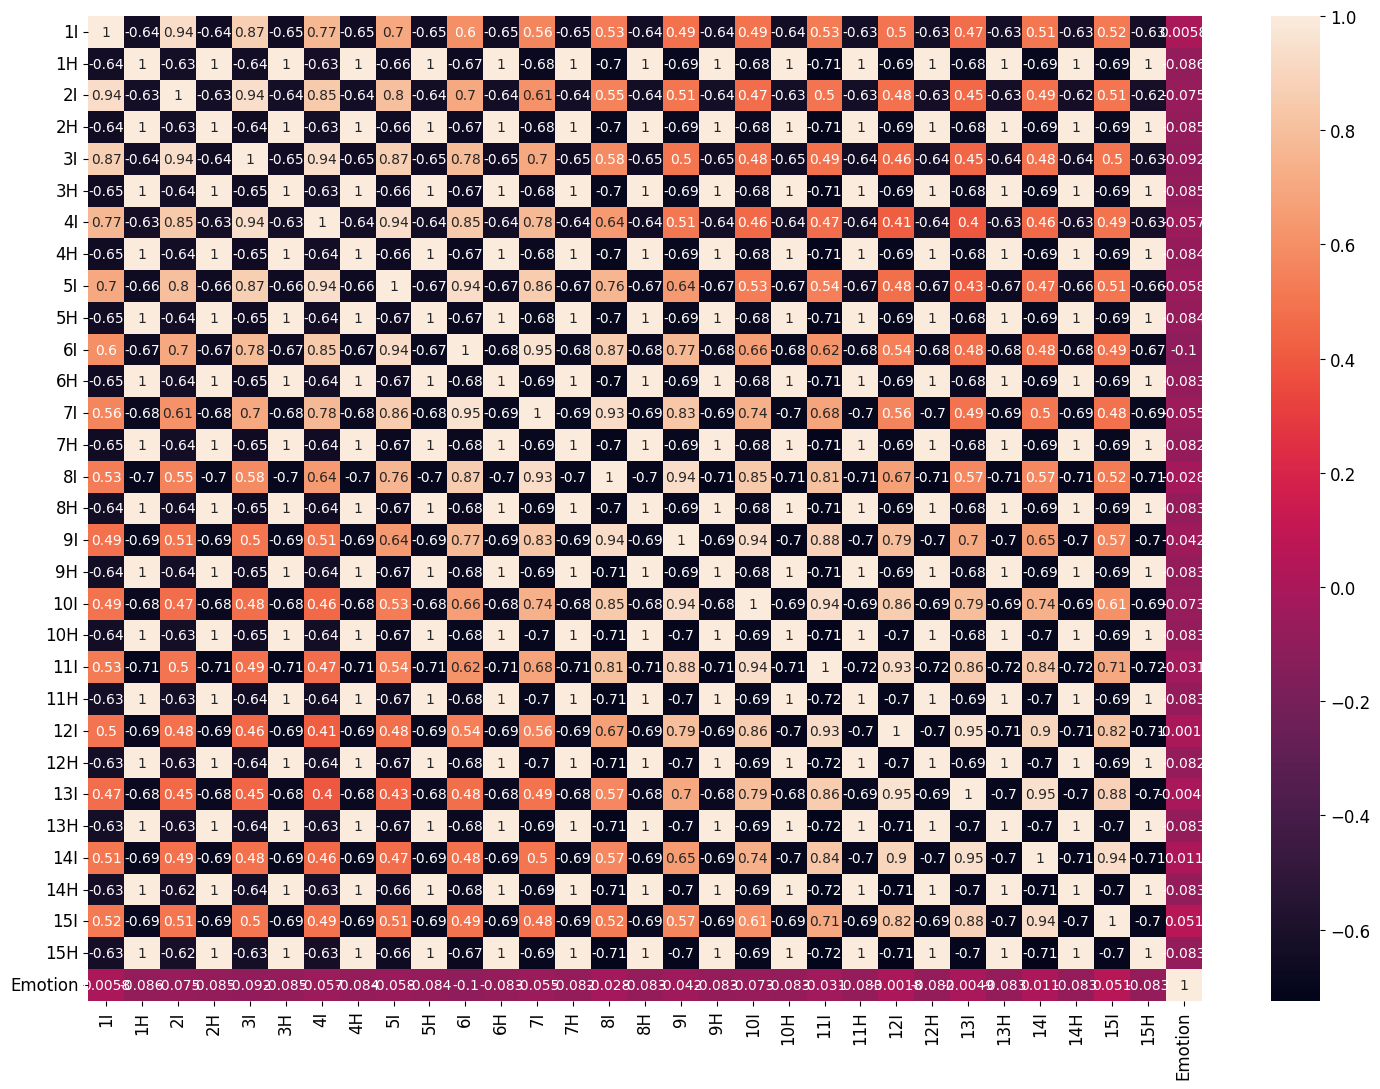

In [122]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
save_fig("correlation_matrix")
plt.plot()

Next we use the standard scaler from scikit learn to standadize out dataset. All non binary parameters will be subject to scaling.

In [123]:
scaler = StandardScaler()
columns_to_be_scaled = ['1I', '1H', '2I', '2H', '3I', '3H','4I', '4H', '5I', '5H', '6I', '6H','7I', '7H', '8I', '8H', '9I', '9H','10I', '10H', '11I', '11H', '12I', '12H','13I', '13H', '14I', '14H', '15I', '15H']
df[columns_to_be_scaled] = scaler.fit_transform(df[columns_to_be_scaled])

After the data has been preprocessed we will assign the data accordingly. The result of the model "target" will be assigned to y and every parameter except "target" will be assigned as the training inputs.  

In [124]:
y = df['Emotion']
X = df.drop(['Emotion'], axis = 1)

Next we split the data as needed. For this tutorial we will split the data 90:10 meaning 90% will be used for training and the remaining 10% will be used to testing and verifying the model. 

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

## K-nearest Neighbours

First machine learning we will be using the K nearest neighbour. For that we will check K from 1 to 30 to find the best K value.

In [126]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Next we will plot that so we can visualize the best K value.

Saving figure KNN_dif_values


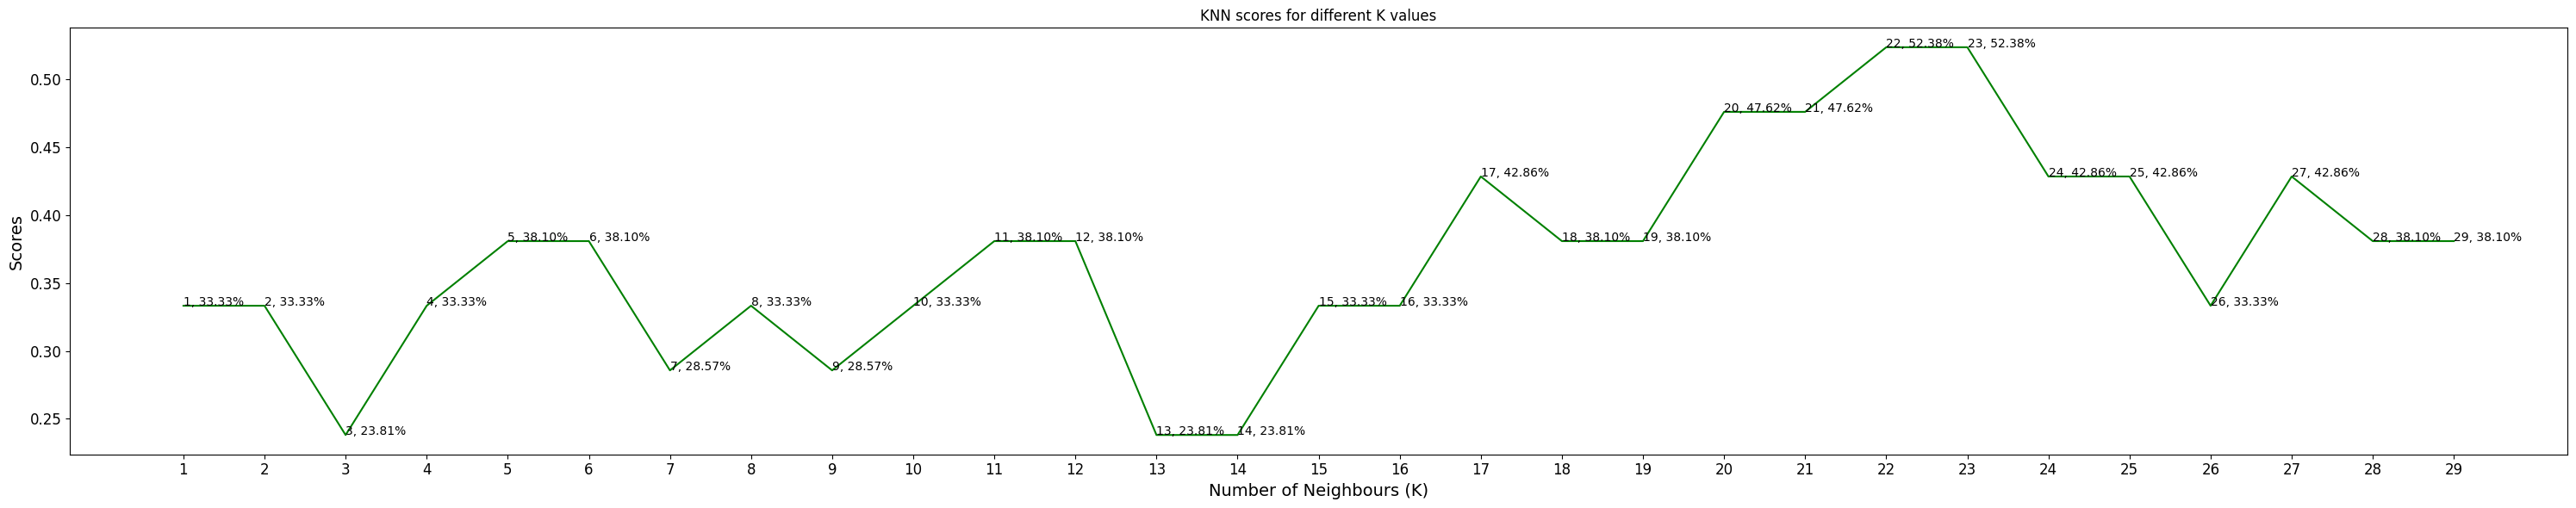

In [127]:
plt.rcParams['figure.figsize'] = [30, 6]
plt.plot([k for k in range(1, 30)], knn_scores, color = 'green')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], "%d, %.2f%%"%(i, knn_scores[i-1]*100))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Scores')
plt.title('KNN scores for different K values')
save_fig("KNN_dif_values")

The score for K Neighbors Classifier is 52.38% with 22 neighbours. Lets look at the classification report and the confusion matrix to better understand the accuracy of the model.

In [146]:
model1 = KNeighborsClassifier(n_neighbors = 22) 
model1.fit(X_train, y_train) 

y_pred1 = model1.predict(X_test) 
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.75      0.38      0.50         8
           3       0.50      0.67      0.57         9

    accuracy                           0.52        21
   macro avg       0.55      0.51      0.51        21
weighted avg       0.58      0.52      0.52        21



Saving figure KNN_CM


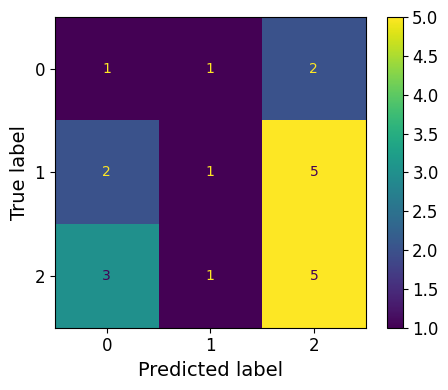

In [129]:
cm1 = confusion_matrix(y_test, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
_, ax = plt.subplots(figsize =(5, 4))
disp1.plot(ax=ax)
save_fig("KNN_CM")

## Support Vector Machine (SVM) Classifier

Next machine learning method used is SVM. For SVM the model is trained with four kernals to compare which is the best model for our dataset.

In [130]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Saving figure SVM_Kernals


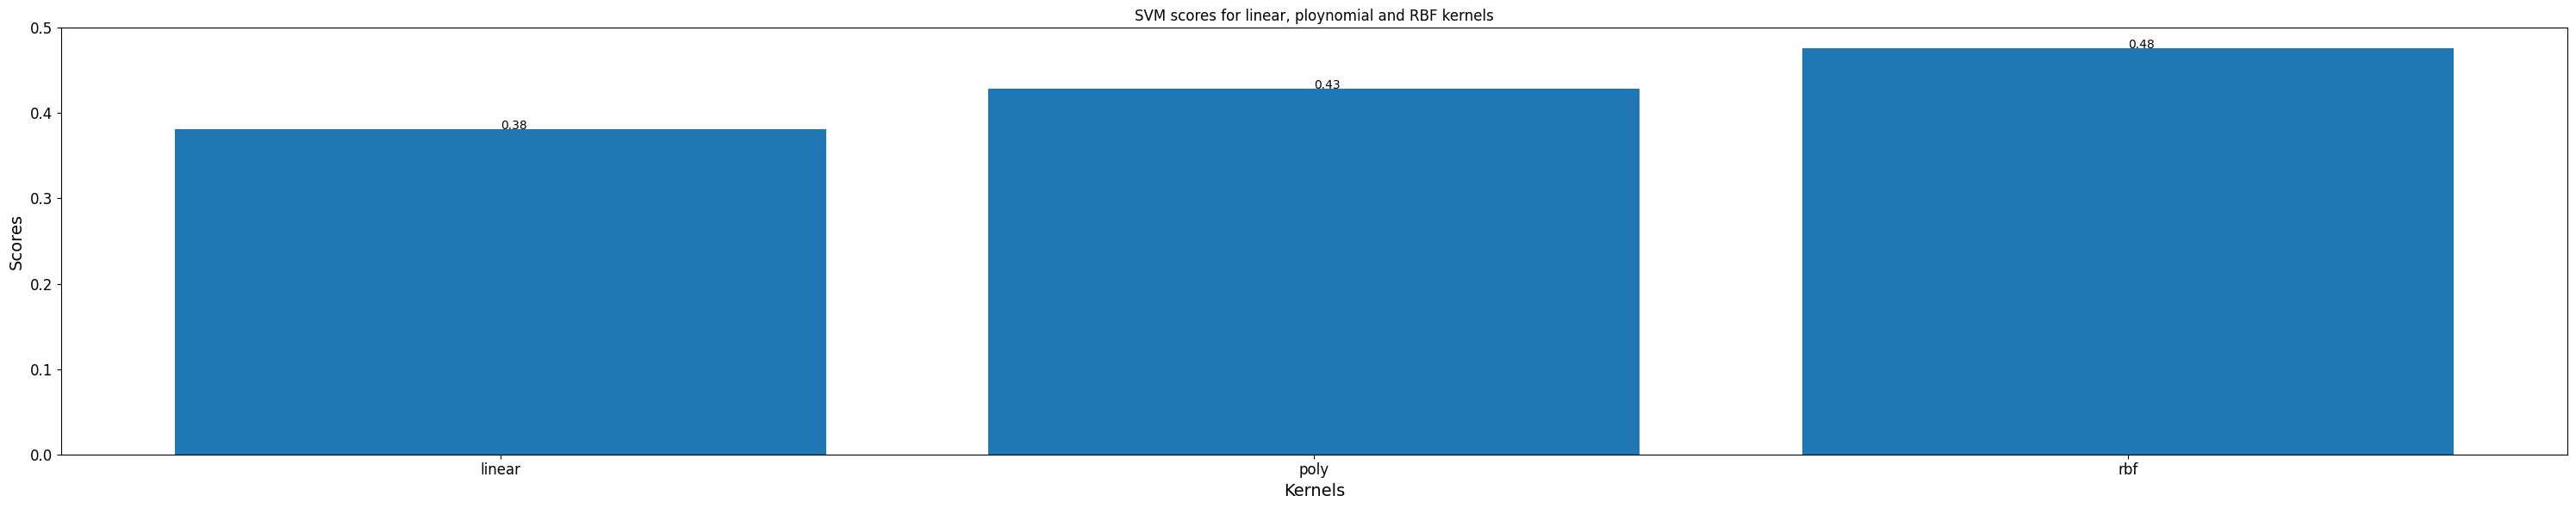

In [131]:
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], "%.2f"%svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM scores for linear, ploynomial and RBF kernels')
save_fig("SVM_Kernals")

The score for Support Vector Classifier is 48% with rbf kernel  Lets look at the confusion matrix for rbf kernal.

In [147]:
model2 = SVC(kernel = 'rbf') 
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test) 
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.50      0.75      0.60         4
           2       0.00      0.00      0.00         8
           3       0.47      0.78      0.58         9

    accuracy                           0.48        21
   macro avg       0.32      0.51      0.39        21
weighted avg       0.30      0.48      0.36        21



C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: Unde

Saving figure SVM_CM


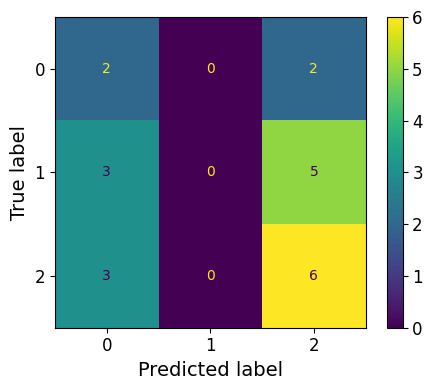

In [133]:

cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
_, bx = plt.subplots(figsize =(5, 4))
disp2.plot(ax=bx)
save_fig("SVM_CM")

## Decision Tree Classifier

In [134]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Saving figure DT_for_diff_scores


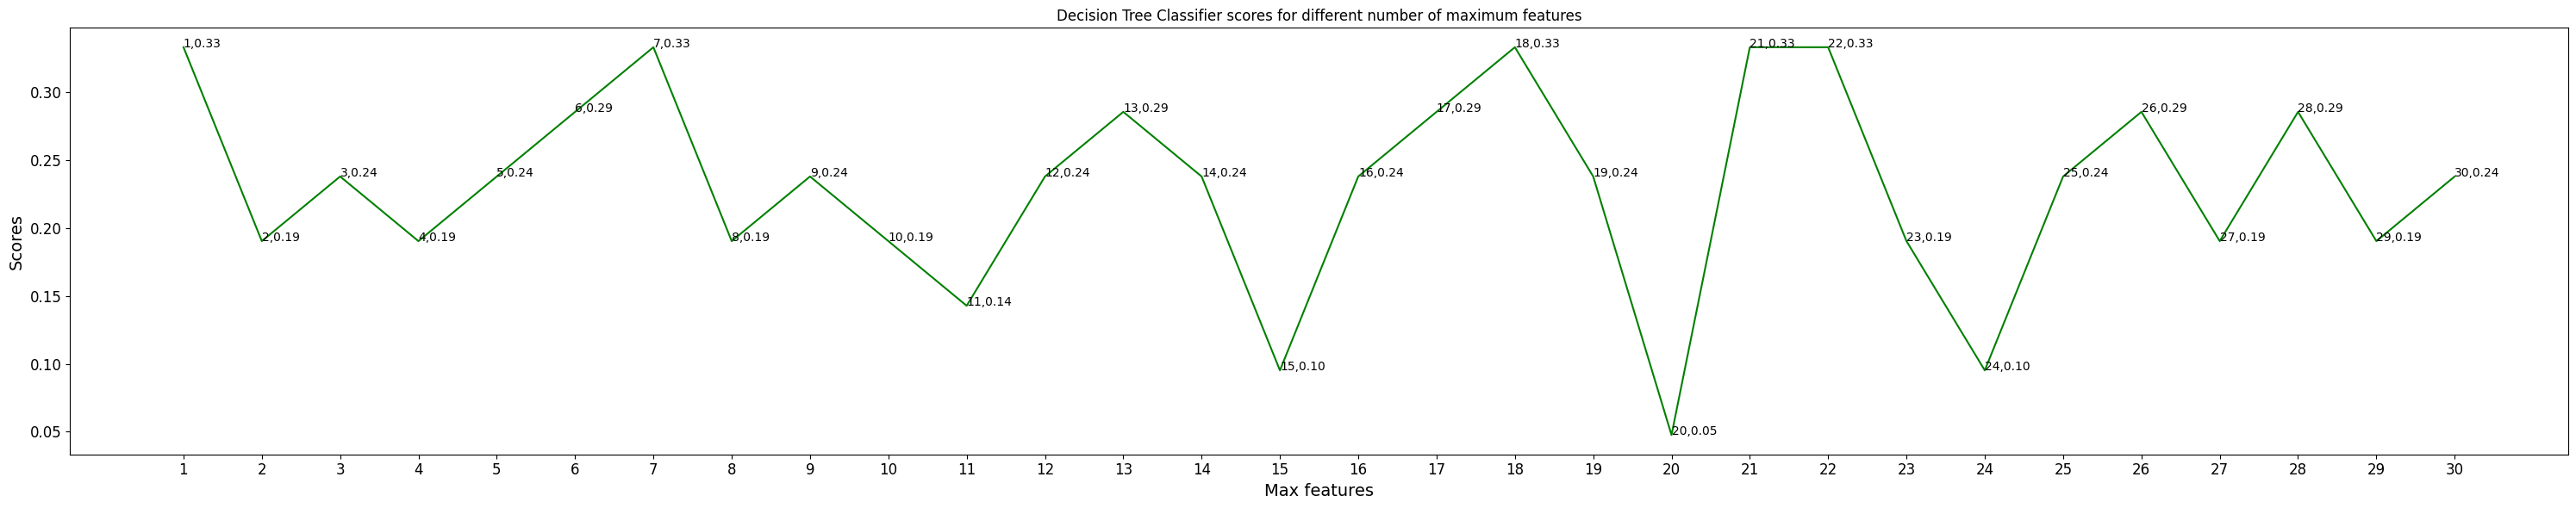

In [135]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1],"%d,%.2f"%(i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
save_fig("DT_for_diff_scores")

The score for Decision Tree Classifier is 33% with 1 maximum features.

In [148]:
model3 = DecisionTreeClassifier(max_features = 1, random_state=0)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.29      0.50      0.36         4
           2       0.44      0.50      0.47         8
           3       0.20      0.11      0.14         9

    accuracy                           0.33        21
   macro avg       0.31      0.37      0.33        21
weighted avg       0.31      0.33      0.31        21



Saving figure DT_CM


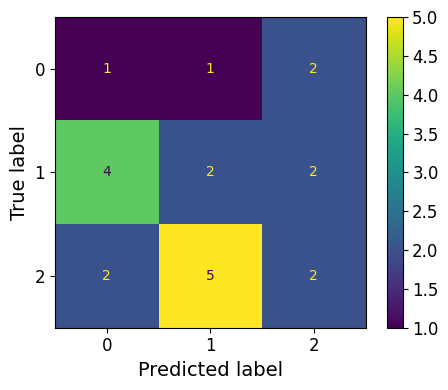

In [137]:
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
_, cx = plt.subplots(figsize =(5, 4))
disp3.plot(ax=cx)
save_fig("DT_CM")

## Random Forest Classifier

In [138]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Saving figure RF_for_diff_scores


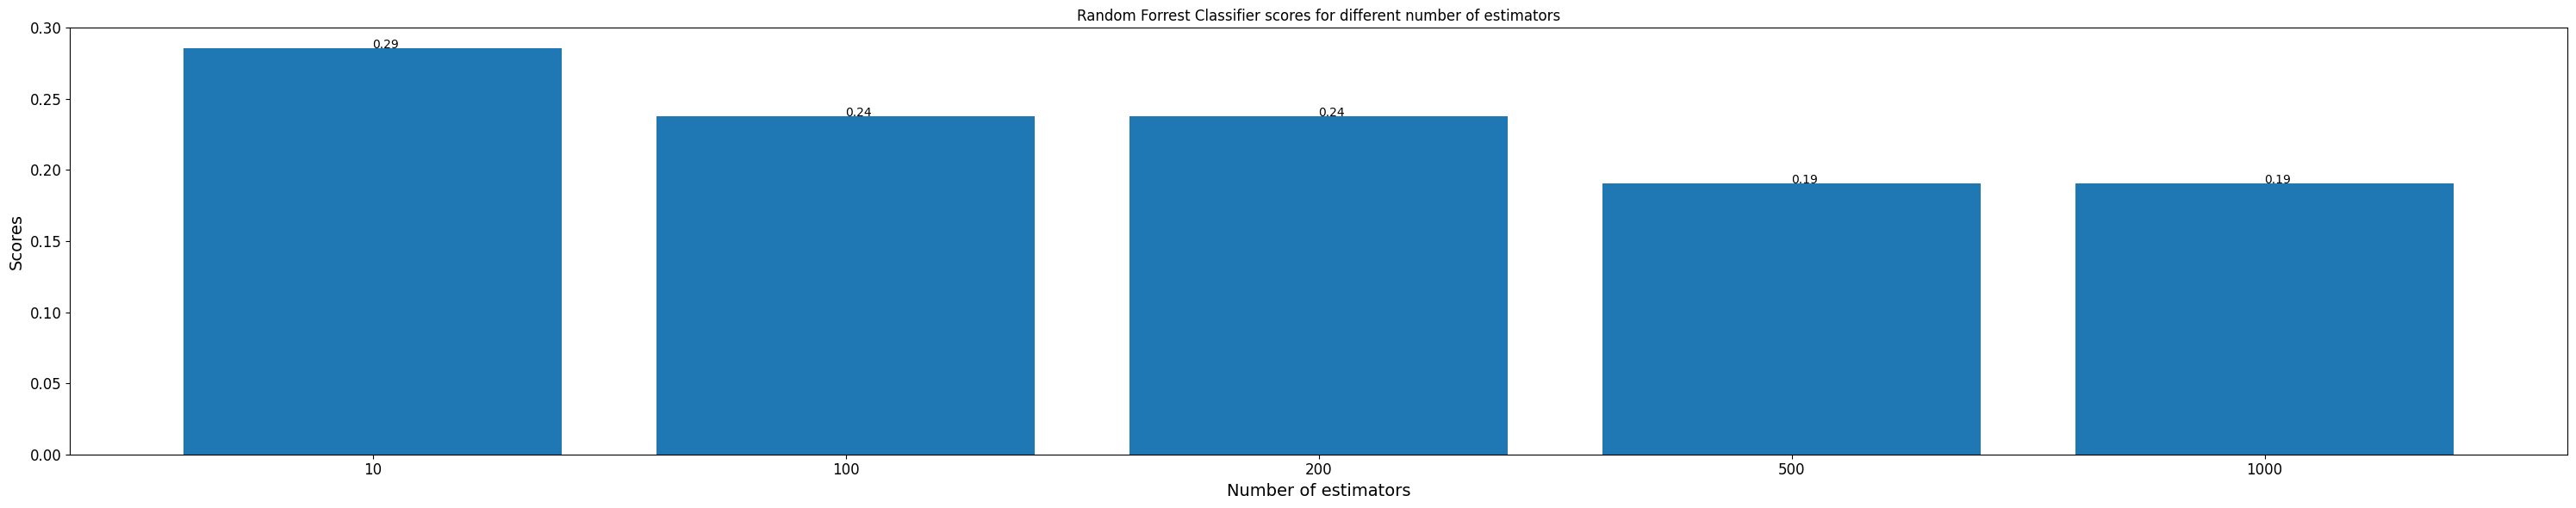

In [139]:

plt.bar([i for i in range(len(estimators))], rf_scores, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], "%.2f"%rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forrest Classifier scores for different number of estimators')
save_fig("RF_for_diff_scores")

The score for Random Forest Classifier is 29% with 10 estimators.

In [140]:
model4 = RandomForestClassifier(n_estimators = 10,random_state=0)
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test) 
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.25      0.25      0.25         8
           3       0.33      0.33      0.33         9

    accuracy                           0.24        21
   macro avg       0.19      0.19      0.19        21
weighted avg       0.24      0.24      0.24        21



Saving figure RF_CM


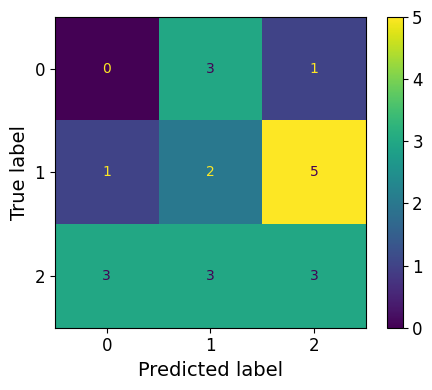

In [141]:
cm4 = confusion_matrix(y_test, y_pred4)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
_, dx = plt.subplots(figsize =(5, 4))
disp4.plot(ax=dx)
save_fig("RF_CM")

## Logistic Regression

In [142]:
model5 = LogisticRegression(random_state=0)
model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         4
           2       0.25      0.12      0.17         8
           3       0.55      0.67      0.60         9

    accuracy                           0.43        21
   macro avg       0.38      0.43      0.39        21
weighted avg       0.39      0.43      0.40        21



Saving figure LR_CM


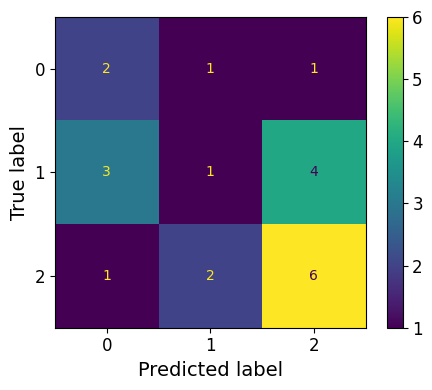

In [143]:
cm5 = confusion_matrix(y_test, y_pred5)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5)
_, ex = plt.subplots(figsize =(5, 4))
disp5.plot(ax=ex)
save_fig("LR_CM")

## Naive Bayes Classifier

In [144]:
model6 = GaussianNB() 
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.44      1.00      0.62         8
           3       0.67      0.22      0.33         9

    accuracy                           0.48        21
   macro avg       0.37      0.41      0.32        21
weighted avg       0.46      0.48      0.38        21



C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Don\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: Unde

Saving figure NB_CM


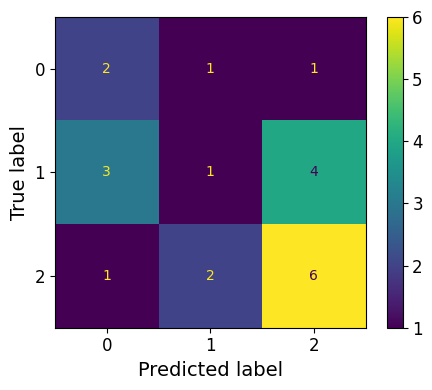

In [145]:
cm6 = confusion_matrix(y_test, y_pred6)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6)
_, fx = plt.subplots(figsize =(5, 4))
disp5.plot(ax=fx)
save_fig("NB_CM")